# **RESEARCH QUESTION**
Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes. New Section

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading and previewing our data
finance_df=pd.read_csv('Financial Dataset - 1.csv')
finance_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
#rows and columns
finance_df.shape

(23524, 13)

In [4]:
#checking the dataframe dataset
finance_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## **Data Cleaning**

In [5]:
#checking for null values
finance_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
#dropping null values
finance_df.dropna(how='any', inplace=True)

In [7]:
#rechecking for null values
finance_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [8]:
finance_df.shape

(23343, 13)

In [9]:
#renaming columns
finance_df.rename(columns={'The relathip with head': 'Relationship with Head', 'country':'Country', 'year':'Year', 'uniqueid':'UniqueID', 'household_size' : 'Household_Size','gender_of_respondent':'Gender of Respondent', 'marital_status': 'Marital Status'}, inplace=True)
finance_df.keys()

Index(['Country', 'Year', 'UniqueID', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'Household_Size', 'Respondent Age',
       'Gender of Respondent', 'Relationship with Head', 'Marital Status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

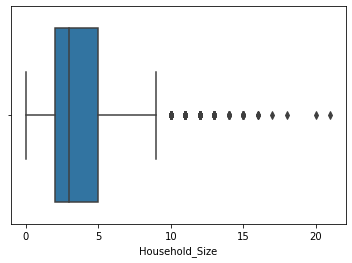

In [10]:
#checking for outliers in Household_Size
sns.boxplot(x=finance_df['Household_Size'])


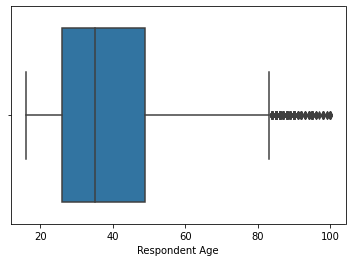

In [11]:
#checking for outliers in Respondent Age
sns.boxplot(x=finance_df['Respondent Age'])

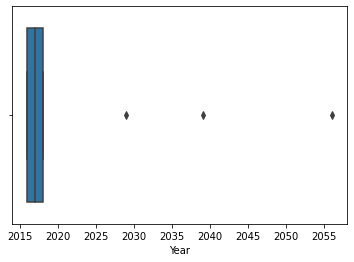

In [12]:
#checking for outliers in Year
sns.boxplot(x=finance_df['Year'])

In [13]:
#checking for outliers in Year
finance_df['Year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [0]:
#dropping the anomalies in the column Year
anom=finance_df[finance_df['Year']>2018].index
finance_df.drop(anom, inplace=True)

In [15]:
#finding the IQR
Q1 = finance_df.quantile(0.25)
Q3 = finance_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year               2.0
Household_Size     3.0
Respondent Age    23.0
dtype: float64


In [0]:
#printing out the ouliers
print(finance_df < (Q1 - 1.5 * IQR)) |(finance_df> (Q3 + 1.5 * IQR))


In [18]:
#removing the anomalies
finance_df_out = finance_df[~((finance_df < (Q1 - 1.5 * IQR)) |(finance_df > (Q3 + 1.5 * IQR))).any(axis=1)]
finance_df_out.shape

(22725, 13)

In [19]:
finance_df.keys()

Index(['Country', 'Year', 'UniqueID', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'Household_Size', 'Respondent Age',
       'Gender of Respondent', 'Relationship with Head', 'Marital Status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

## **Exploratory Data Analysis**

## Univariate analysis

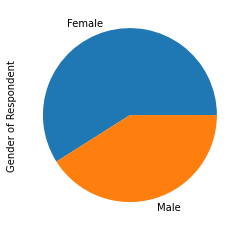

In [20]:
#distribution of gender in the population
finance_df['Gender of Respondent'].value_counts().head(10).plot.pie()

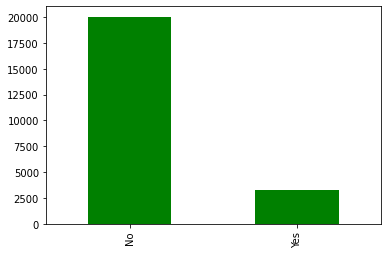

In [21]:
#distribution of people having banking account in the population
finance_df['Has a Bank account'].value_counts().head(10).plot.bar(color='green')

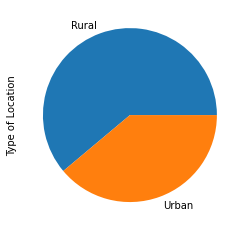

In [22]:
finance_df['Type of Location'].value_counts().head(10).plot.pie()

In [23]:
print( finance_df['Respondent Age'].mean())
print(finance_df['Household_Size'].mean())

38.80706940874036
3.688560411311054


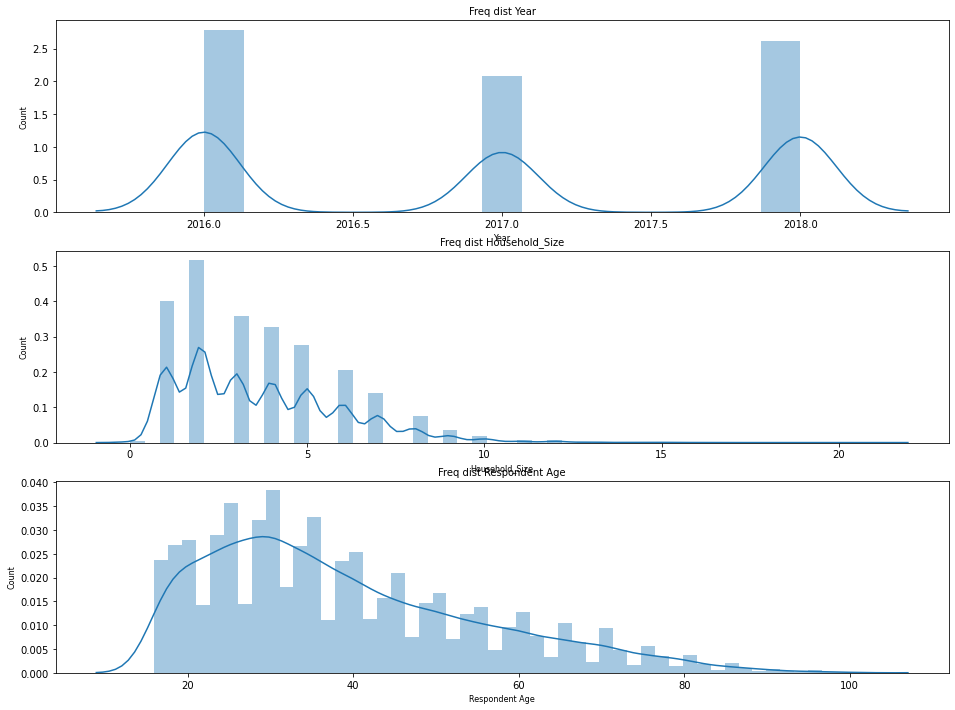

In [24]:
#dist plot for the numerical attributes
col_names = ['Year', 'Household_Size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(finance_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

## **Bivariate Analysis**

Country
Kenya       6062
Rwanda      8683
Tanzania    6500
Uganda      2095
Name: Has a Bank account, dtype: int64


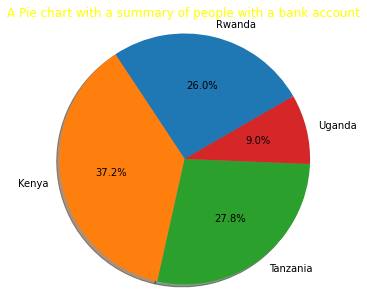

In [33]:
# A pie chart showing the distribution of individuals with bank accounts per country
#kenya has the majority of people with bank accounts
bank =finance_df.groupby(['Country'])['Has a Bank account'].count()
print(bank)
label = ['Rwanda','Kenya','Tanzania','Uganda']
label

plt.figure(figsize=(5,5))
plt.pie(bank, labels = label, autopct= '%1.1f%%', shadow= True,  startangle= 30)
plt.axis('equal')
plt.title('A Pie chart with a summary of people with a bank account', color='yellow')
plt.show()

kenya has the majority of people with bank accounts

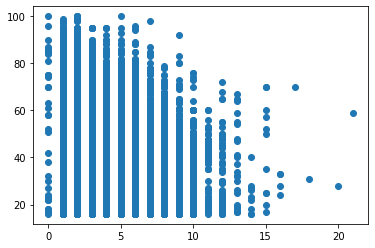

In [34]:
#scatter plot
plt.scatter(finance_df['Household_Size'], finance_df['Respondent Age'] )

In [0]:
No correlation between Household_Size and Respondent Age

In [36]:
#finding if there is any correlation between the numerical fields
pearson_coeff = finance_df['Year'].corr(finance_df['Respondent Age'], method="pearson") 
print(pearson_coeff)
pearson_coeff2 = finance_df['Household_Size'].corr(finance_df['Respondent Age'], method="pearson") 
print(pearson_coeff2)
pearson_coeff2 = finance_df['Household_Size'].corr(finance_df['Year'], method="pearson") 
print(pearson_coeff2)

-0.018554208106743474
-0.1196711523415487
-0.05248406515317324


No correlation between the numerical attributes

## **Multivariate Analysis**

In [37]:

feature_df=finance_df.drop('UniqueID',  axis=1)
feature_df.head()

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent Age,Gender of Respondent,Relationship with Head,Marital Status,Level of Educuation,Type of Job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [0]:
#mapping categorical variables into 0 and 1
def bank_account_num(x):

  if x=="Yes":
      return 1
  else:
      return 0

def gender_num(x):
  if x=="Male":
      return 1
  else:
      return 0
def location_num(x):
  if x=="Urban":
    return 1
  else:
    return 0
    
def phone_num(x):
  if x=="Yes":
      return 1
  else:
      return 0
    


In [39]:
finance_df.keys()

Index(['Country', 'Year', 'UniqueID', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'Household_Size', 'Respondent Age',
       'Gender of Respondent', 'Relationship with Head', 'Marital Status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [0]:
feature_df['Has a Bank account']=feature_df['Has a Bank account'].apply(lambda x:bank_account_num(x))
feature_df['Gender of Respondent']=feature_df['Gender of Respondent'].apply(lambda x:gender_num(x))
feature_df['Type of Location']=feature_df['Type of Location'].apply(lambda x:location_num(x))
feature_df['Cell Phone Access']=feature_df['Cell Phone Access'].apply(lambda x:phone_num(x))

In [41]:
feature_df.head()

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent Age,Gender of Respondent,Relationship with Head,Marital Status,Level of Educuation,Type of Job
0,Kenya,2018,1,0,1,3.0,24.0,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,0,0,5.0,70.0,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,1,1,5.0,26.0,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,0,1,5.0,34.0,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,1,0,8.0,26.0,1,Child,Single/Never Married,Primary education,Informally employed


In [0]:
maxi=max(feature_df['Respondent Age'])
feature_df['Respondent Age']=feature_df['Respondent Age'].apply(lambda x:x/maxi)
maxi=max(feature_df['Household_Size'])
feature_df['Household_Size']=feature_df['Household_Size'].apply(lambda x:x/maxi)

In [43]:
feature_df.head()

,Country,Year,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent Age,Gender of Respondent,Relationship with Head,Marital Status,Level of Educuation,Type of Job
0,Kenya,2018,1,0,1,0.142857,0.24,0,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,0,0,0,0.238095,0.70,0,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,1,1,1,0.238095,0.26,1,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,0,0,1,0.238095,0.34,0,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,0,1,0,0.380952,0.26,1,Child,Single/Never Married,Primary education,Informally employed


In [0]:
feature_df = pd.get_dummies(feature_df, columns=['Relationship with Head'], prefix = ['R.W.H'])
feature_df = pd.get_dummies(feature_df, columns=['Year'], prefix = ['Y'])
feature_df = pd.get_dummies(feature_df, columns=['Marital Status'], prefix = ['MS'])
feature_df = pd.get_dummies(feature_df, columns=['Level of Educuation'], prefix = ['EL'])
feature_df = pd.get_dummies(feature_df, columns=['Type of Job'], prefix = ['JT'])
feature_df = pd.get_dummies(feature_df, columns=['Country'], prefix = ['C'])

In [45]:
feature_df.head()

,Has a Bank account,Type of Location,Cell Phone Access,Household_Size,Respondent Age,Gender of Respondent,R.W.H_Child,R.W.H_Head of Household,R.W.H_Other non-relatives,R.W.H_Other relative,R.W.H_Parent,R.W.H_Spouse,Y_2016,Y_2017,Y_2018,MS_Divorced/Seperated,MS_Dont know,MS_Married/Living together,MS_Single/Never Married,MS_Widowed,EL_6,EL_No formal education,EL_Other/Dont know/RTA,EL_Primary education,EL_Secondary education,EL_Tertiary education,EL_Vocational/Specialised training,JT_Dont Know/Refuse to answer,JT_Farming and Fishing,JT_Formally employed Government,JT_Formally employed Private,JT_Government Dependent,JT_Informally employed,JT_No Income,JT_Other Income,JT_Remittance Dependent,JT_Self employed,C_Kenya,C_Rwanda,C_Tanzania,C_Uganda
0,1,0,1,0.142857,0.24,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0.238095,0.70,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,1,1,1,0.238095,0.26,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,0,0,1,0.238095,0.34,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0.380952,0.26,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [0]:
# divide the dataset into a feature set and corresponding labels. 
# The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.

X = feature_df.drop('Has a Bank account', axis=1)
y = feature_df['Has a Bank account']

In [0]:
# Splitting the dataset into the Training set and Test set


from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=101)


In [0]:
#Normalization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Applying PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [54]:
#Training and Making Predictions
from sklearn.ensemble import RandomForestClassifier
clf =  RandomForestClassifier(bootstrap=False, criterion="entropy", max_features=0.55, min_samples_leaf=8, min_samples_split=12, n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features=0.55,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
#Predicting the Test set results and finding the accuracy
y_pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print("Accuracy: %.2f%%" % (accuracy_score(y_test, y_pred)*100))
print("F1: %.2f%%" % (f1_score(y_test, y_pred)*100))

Accuracy: 88.95%
F1: 46.14%


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [58]:
#Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.43785497, 0.30481042])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [60]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[4036    0]
 [ 632    0]]
Accuracy 0.8646101113967438
